In [98]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys

sys.path.append("/Users/lpozzi/Documents/GitHub/polso/strava/")

import pandas as pd


from strava_dash import StravaScraper



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [99]:
%%capture
training = StravaScraper()
training.get_swims(after='2017-11-01', before='2018-09-30')
training.get_xtraining(after='2017-11-01', before='2018-09-30')

### The Plan

| Month    | Days | Yardage |    Yds/Day   |  Yds/Week |  max hrs  |
| :------- |:---: | :-----: | :----------: | :-------: | :-------: |
| November | 30   |  80000  | 2,857.14285  |   20000   |    7.6    |
| December | 31   | 125000  | 4032.258065  |   25000   |    7.6    |
| January  | 31   | 125000  | 4032.258065  |   28000   |    7.6    |
| February | 28   | 130000  | 4642.857143  |   32500   |    9.8    |
| March    | 31   | 140000  | 4516.129032  |   31615   |   10.6    |
| April    | 31   | 140000  | 4516.129032  |   31615   |   10.6    |
| May      | 31   | 140000  | 4516.129032  |   31615   |    8.5    |
| June     | 30   | 150000  | 5000         |   35000   |   11.4    |

## The Execution

Shots?

In [5]:
from IPython.display import Markdown

Markdown("""
##### Total Yards: {0} 
""".format(training.total_yards))


##### Total Yards: 906023 


In [6]:
training.monthly_yardage

,distance,hours,weekly distance
start_date,,,
January,66520.140582,19.327222,16630.035146
February,78037.494297,22.824167,19509.373574
March,126980.041349,38.380833,31745.010337
April,106163.393721,30.941111,26540.848430
May,91044.672915,28.476667,22761.168229
June,121913.564941,28.591667,30478.391235
July,92905.122247,27.617778,23226.280562
August,13375.943910,4.436944,3343.985977
September,33562.344095,8.950833,8390.586024


In [7]:
training.in_out

,total,percentage
is_pool,,
open water,620617.550784,68.499072
pool,285405.744638,31.500928


Ups and downs

cold

sick

demotivated

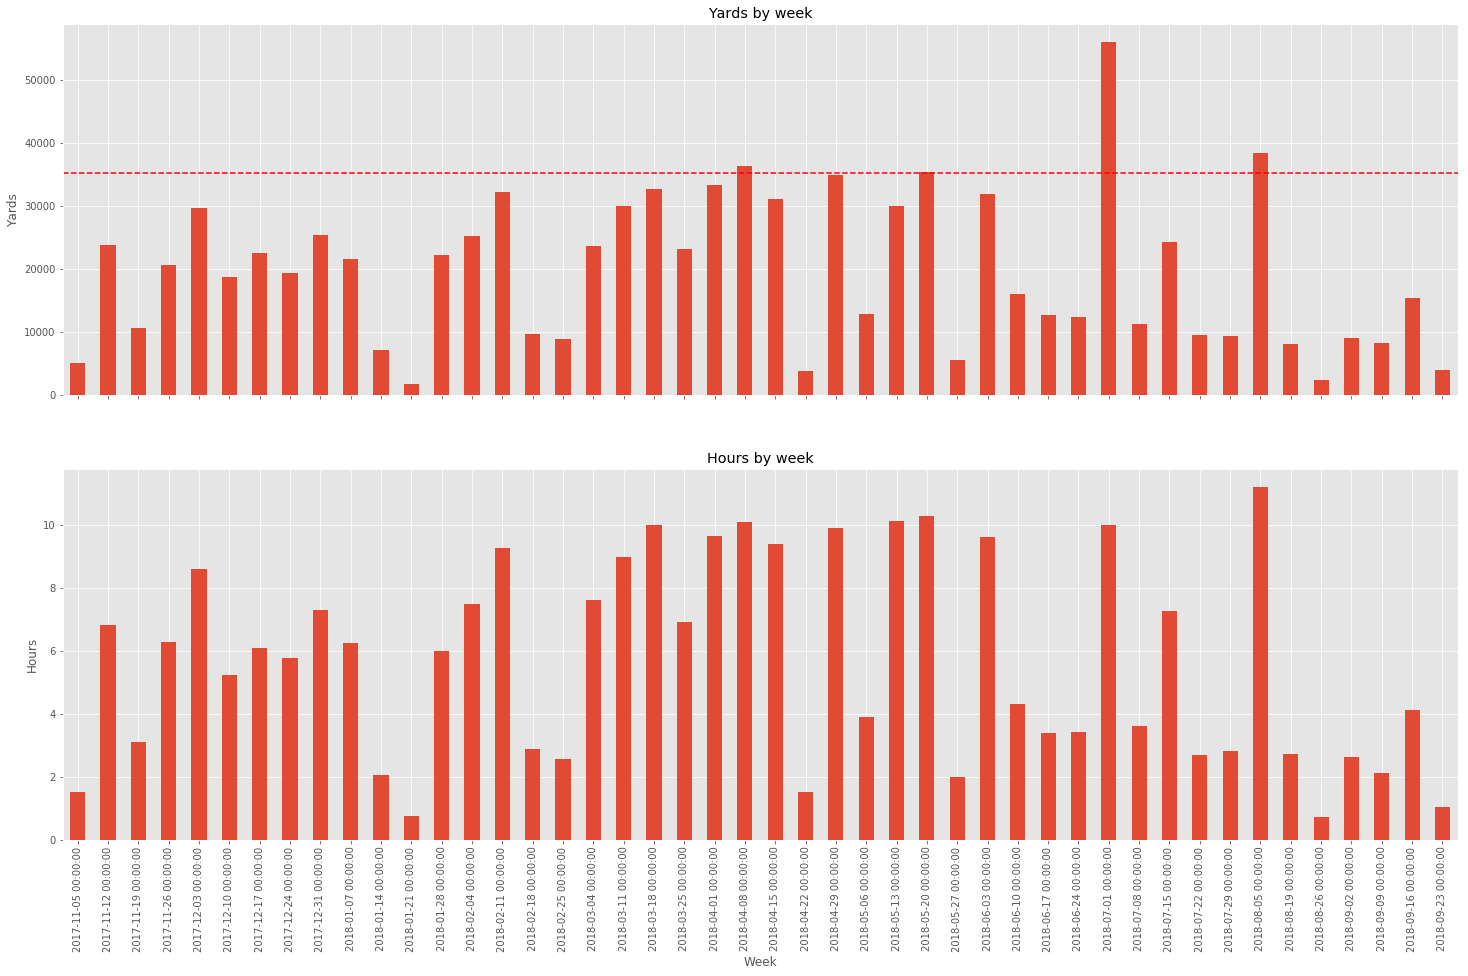

In [67]:
tmp = training.plot_summary()

Paradigm switch

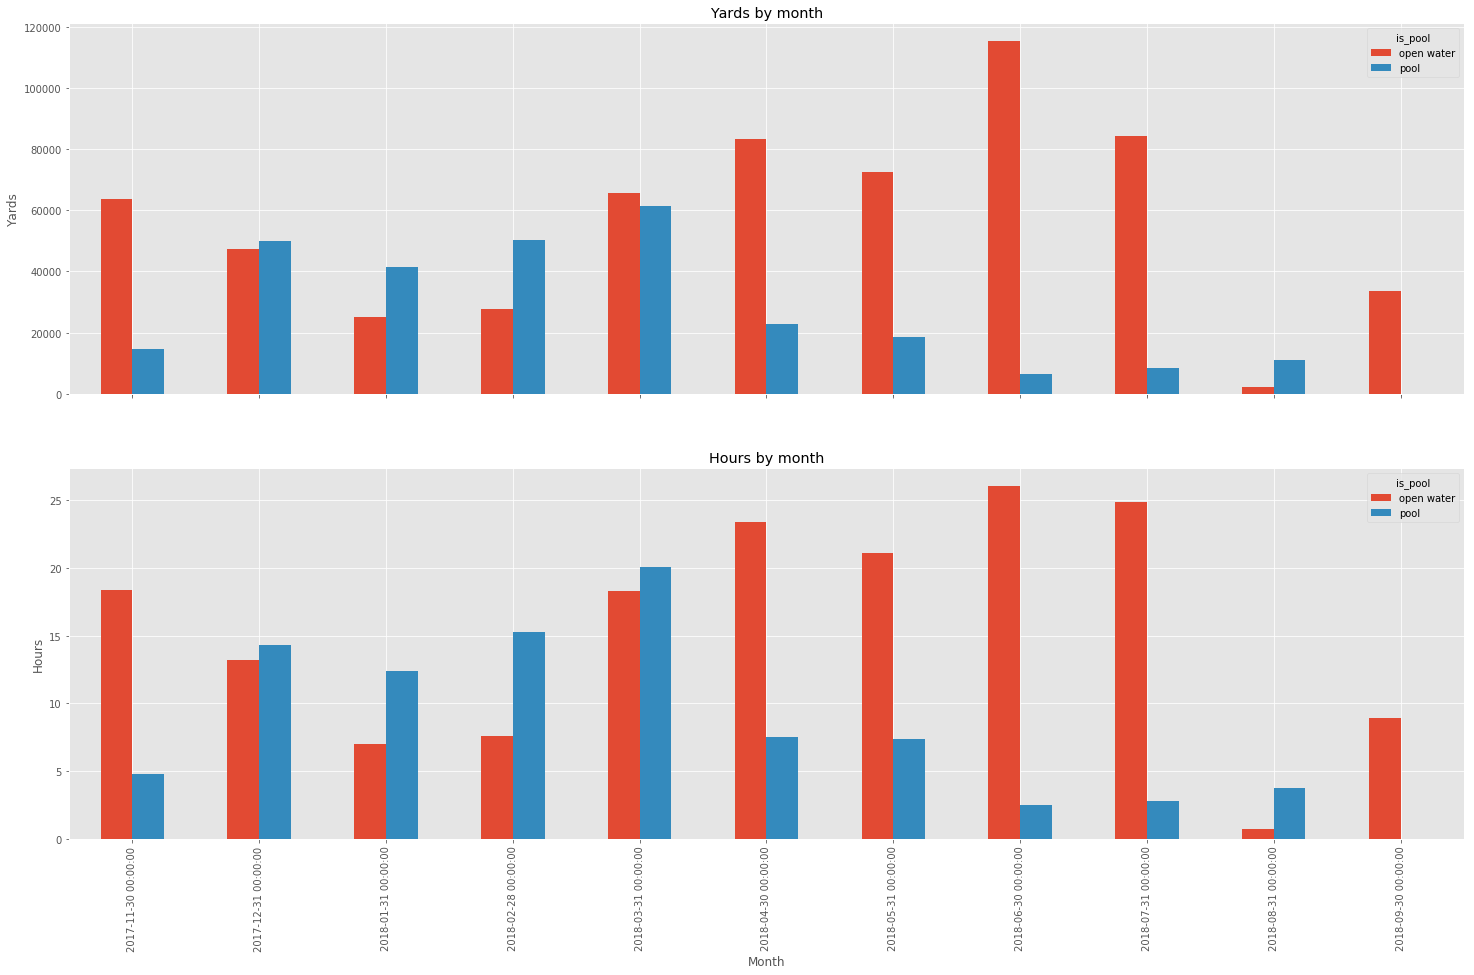

In [69]:
tmp = training.plot_summary(in_n_out=True, by='month')

### Crosstraining

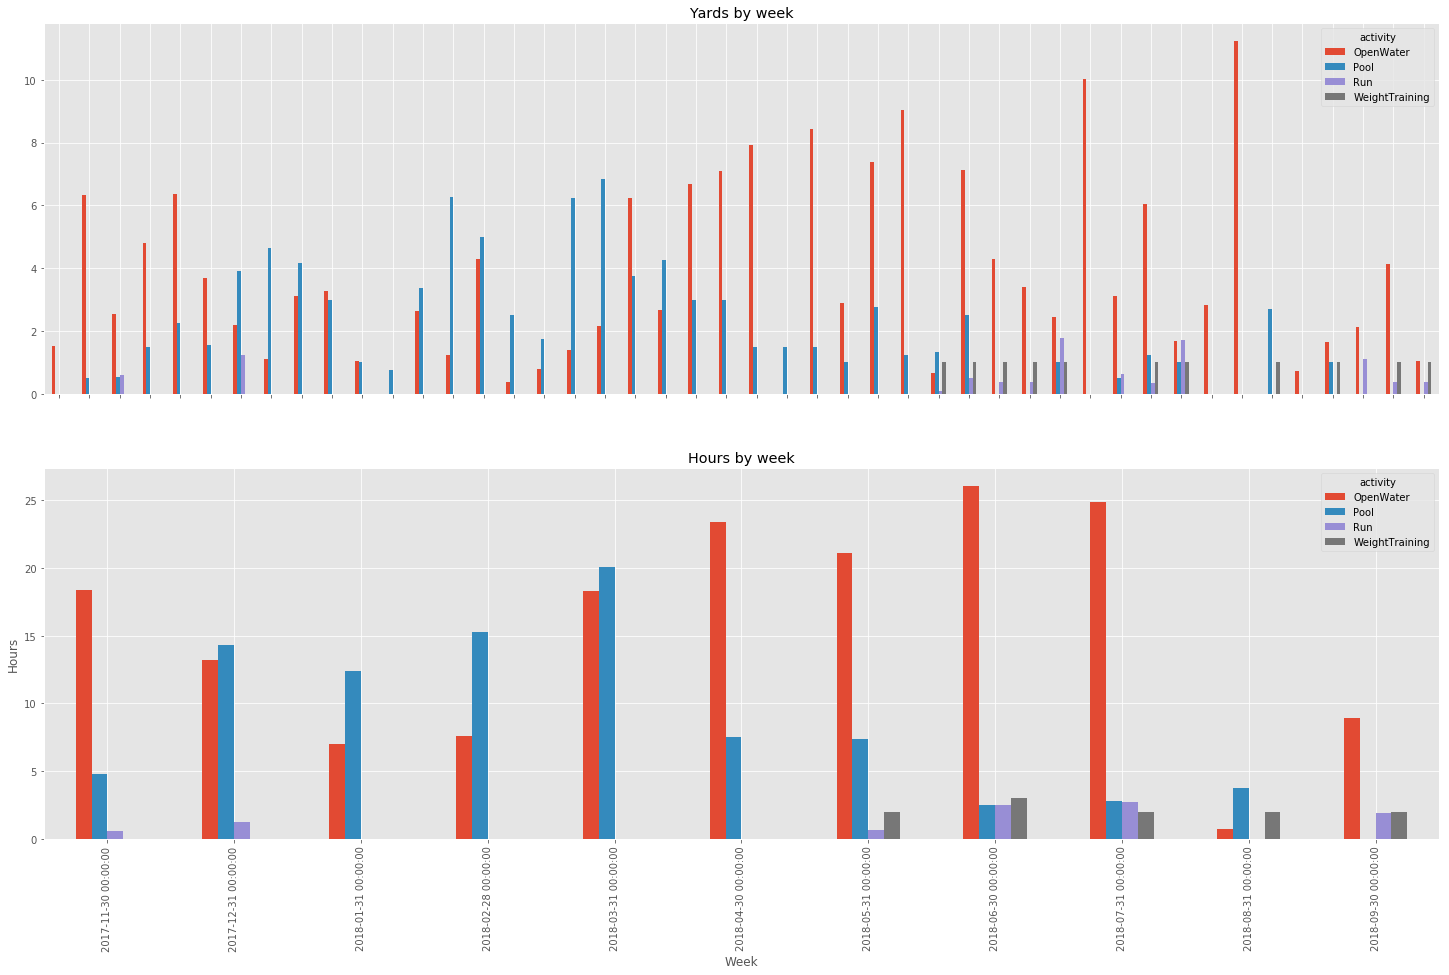

In [70]:
tmp=training.plot_x_training()

## Year on Year

In [47]:
%%capture
training_old = StravaScraper()
training_old.get_swims(after='2017-01-01', before='2017-09-05')

In [54]:
Markdown("""
##### Year on Year: 2017/2018 = {0:%} 2016/2017
""".format(training.total_yards / float(training_old.total_yards)))  


##### Year on Year: 2017/2018 = 78.650561% 2016/2017


In [58]:
training.in_out / training_old.in_out

,total,percentage
is_pool,,
open water,0.905412,1.151183
pool,0.611793,0.777862


In [67]:
monthly_yoy = pd.merge(left=training.monthly_yardage, right=training_old.monthly_yardage, how='inner', #on='start_date',
         left_index=True, right_index=True, sort=True,
         suffixes=('_new', '_old'))

monthly_yoy['distance_yoy'] = monthly_yoy.distance_new / monthly_yoy.distance_old
monthly_yoy['weekly_distance_yoy'] = monthly_yoy['weekly distance_new'] / monthly_yoy['weekly distance_old']
monthly_yoy['hours_yoy'] = monthly_yoy.hours_new / monthly_yoy.hours_old

monthly_yoy[['distance_yoy', 'weekly_distance_yoy', 'hours_yoy']].style.format("{:.2%}")


,distance_yoy,weekly_distance_yoy,hours_yoy
start_date,,,
April,63.80%,63.80%,68.02%
August,11.35%,11.35%,13.04%
February,68.48%,68.48%,69.71%
January,56.55%,56.55%,53.43%
July,61.04%,61.04%,62.45%
June,80.61%,80.61%,69.73%
March,83.98%,83.98%,92.42%
May,54.30%,54.30%,64.11%
September,242.02%,242.02%,83.00%


## The Crossings

### 20 Bridges

- signup
- crew
- logistics
- summary

https://lhyderdarlington.wordpress.com/

### Tahoe

- signup
- crew
- logistics
- summary

http://www.laketahoemarathonswimfederation.com/

![png](../images/2018_season/tahoe_track.JPG)

### Anacapa

- signup
- crew
- logistics
- summary

## Reflections

### Training plan and mental Judo

### Gear and nutrition

## Appendix: The Full Training 

In [101]:
from IPython.display import HTML
HTML(training.get_full_training().to_html())

,ds_week_ending,name,distance,hours,activity
start_date,,,,,
2017-11-02 16:59:37-07:00,2017-11-05,Therapy swim,1555.660225,0.443333,open water
2017-11-03 07:19:25-07:00,2017-11-05,Trying to gain the habit back,1676.941574,0.489444,open water
2017-11-04 08:35:01-07:00,2017-11-05,Marinading,1775.585196,0.576111,open water
2017-11-06 07:01:06-08:00,2017-11-12,So it begins.,2592.402505,0.718611,open water
2017-11-07 06:51:15-08:00,2017-11-12,Chafing ‘cos I’m chubby,2571.295832,0.789444,open water
2017-11-07 19:20:00-08:00,2017-11-12,[POOL] back in the pit!,1760.055934,0.500000,pool
2017-11-08 07:19:30-08:00,2017-11-12,Steel grey...,2566.702670,0.688333,open water
2017-11-09 07:01:18-08:00,2017-11-12,Chas Lap (feat. Agent Hornet),3951.103569,1.062778,open water
2017-11-10 14:31:11-08:00,2017-11-12,Better Chas than never,3566.809015,1.039167,open water


[source](https://github.com/mrpozzi/mrpozzi.github.io/blob/master/notebooks/.ipynb)